In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 

In [2]:
iris_df = pd.read_excel('Week_06_HW6_Iris_Dataset.xlsx')
iris_df

,sepalWidth,petalWidth,sampleNum,irisSpecies
0,3.5,0.2,id_1,Iris-setosa
1,3.0,0.2,id_2,Iris-setosa
2,3.6,0.2,id_5,Iris-setosa
3,3.9,0.4,id_6,Iris-setosa
4,3.4,0.3,id_7,Iris-setosa
...,...,...,...,...
95,3.4,1.6,id_86,Iris-versicolor
96,2.3,1.3,id_88,Iris-versicolor
97,3.0,1.4,id_92,Iris-versicolor
98,2.7,1.3,id_95,Iris-versicolor


In [3]:
# Get some dataabout the file
print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepalWidth   100 non-null    float64
 1   petalWidth   100 non-null    float64
 2   sampleNum    100 non-null    object 
 3   irisSpecies  100 non-null    object 
dtypes: float64(2), object(2)
memory usage: 3.2+ KB
None


In [4]:
# Drop the Sample numbe ID from the frame
iris_df.drop(['sampleNum'], axis=1, inplace=True)
iris_df 

,sepalWidth,petalWidth,irisSpecies
0,3.5,0.2,Iris-setosa
1,3.0,0.2,Iris-setosa
2,3.6,0.2,Iris-setosa
3,3.9,0.4,Iris-setosa
4,3.4,0.3,Iris-setosa
...,...,...,...
95,3.4,1.6,Iris-versicolor
96,2.3,1.3,Iris-versicolor
97,3.0,1.4,Iris-versicolor
98,2.7,1.3,Iris-versicolor


In [5]:
# Replace species category with a number.
iris_df['irisSpecies'].replace(['Iris-setosa','Iris-versicolor'], [1,0], inplace=True) 
print("After REPLACEMENT***********************")
iris_df

After REPLACEMENT***********************


,sepalWidth,petalWidth,irisSpecies
0,3.5,0.2,1
1,3.0,0.2,1
2,3.6,0.2,1
3,3.9,0.4,1
4,3.4,0.3,1
...,...,...,...
95,3.4,1.6,0
96,2.3,1.3,0
97,3.0,1.4,0
98,2.7,1.3,0


In [6]:
# See if there is a correation
print(iris_df.corr())

             sepalWidth  petalWidth  irisSpecies
sepalWidth     1.000000   -0.560120     0.684019
petalWidth    -0.560120    1.000000    -0.960158
irisSpecies    0.684019   -0.960158     1.000000


In [7]:
X_var = iris_df.petalWidth.values
Y_var = iris_df.irisSpecies.values

In [8]:
X_var = X_var.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(X_var,Y_var,train_size=0.80
                                                    , random_state=42)

[]

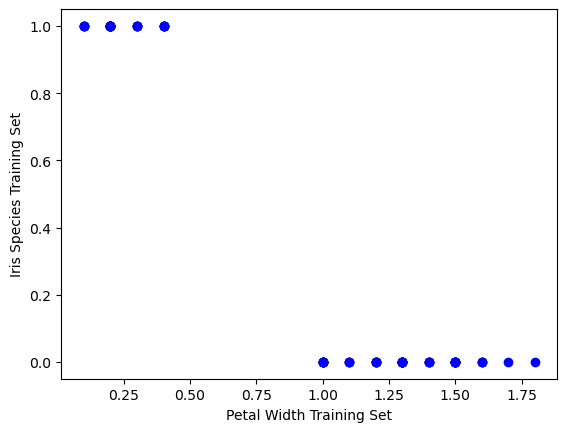

In [9]:
#Scatter plot of X and Y values
plt.scatter(x_train, y_train, color='blue')
plt.xlabel("Petal Width Training Set")
plt.ylabel("Iris Species Training Set")
plt.plot()

R-squared score:  91.68871501015707
[ 0.89312089 -0.03285228  0.97730027 -0.03285228 -0.03285228  0.05132709
  1.06147965  1.06147965  0.80894151  0.97730027  0.80894151  0.97730027
  0.97730027  0.97730027 -0.11703166  0.89312089  0.97730027  0.72476213
  0.89312089  0.64058275]


[]

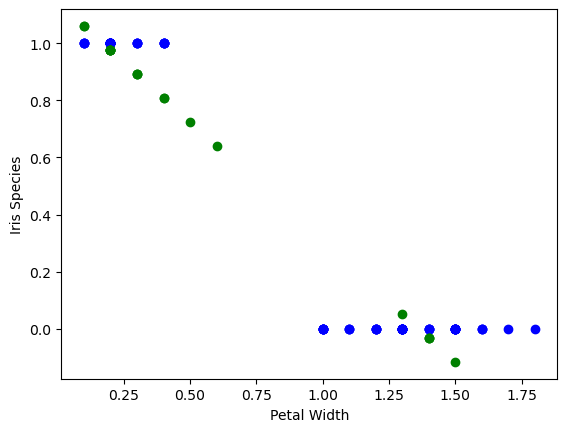

In [10]:
# Create the linear regression
lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)

#Calcualte the score
r_sq = lin_reg.score(x_train , y_train) * 100
print("R-squared score: ", r_sq)

#Predict some values
y_predict = lin_reg.predict(x_test)
#prediced Values
print(y_predict)

plt.scatter(x_train, y_train, color='blue')
plt.scatter(x_test, y_predict, color='green')
plt.xlabel("Petal Width")
plt.ylabel("Iris Species")
plt.plot()

# Multivariate Linear regression

In [11]:
# multivariate
x_ind = iris_df[['sepalWidth','petalWidth']].values.reshape(-1,2)
y_dep = iris_df['irisSpecies']

# Create the model.
lin_reg = linear_model.LinearRegression()
lin_reg.fit(x_ind, y_dep)

LinearRegression()

In [12]:
print('Intercept: \n', lin_reg.intercept_)
print('Coefficients: \n', lin_reg.coef_)
print("R Squared", lin_reg.score(x_ind, y_dep) *100)

x_ind = sm.add_constant(x_ind) # adding a constant

model = sm.OLS(y_dep, x_ind).fit()
predictions = model.predict(x_ind) 
 
print_model = model.summary()
print_model

Intercept: 
 0.38986343610539564
Coefficients: 
 [ 0.2249038  -0.74613476]
R Squared 95.30554654623339


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            irisSpecies   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     984.6
Date:                Tue, 23 May 2023   Prob (F-statistic):           3.73e-65
Time:                        03:47:00   Log-Likelihood:                 80.360
No. Observations:                 100   AIC:                            -154.7
Df Residuals:                      97   BIC:                            -146.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3899      0.099      3.942      0.000       0.194       0.586
x1             0.2249      0.028      8.023      0.000       0.169       0.281
x2            -0.7461      0.024    -31.662      0.000      -0.793      -0.699
==============================================================================
Omnibus:                        3.251   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                2.607
Skew:                           0.308   Prob(JB):                        0.272
Kurtosis:                       3.497   Cond. No.                         31.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""